# Overview
In this notebook, I'll code a KMeans algorithm from scratch.

K-Means Clustering is an unsupervised learning algorithm that aims to group the observations in a given dataset into clusters. The number of clusters is provided as an input. It forms the clusters by minimizing the sum of the distance of points from their respective cluster centroids.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
#import cdist to compute euclidean distance
from scipy.spatial.distance import cdist 
%matplotlib inline

In [3]:
sns.set(rc={'figure.figsize':(20, 7)})

**Load dataset**

In [4]:
crabs = pd.read_csv('data/crabs.csv', sep=";")
crabs.head()

,sex,species,PC1,PC2,PC3,PC4
0,M,B,0.664783,1.240606,0.354814,-1.305615
1,M,B,1.128995,0.654173,-0.708660,0.073854
2,M,B,1.906707,0.599224,-0.350549,-0.827297
3,M,B,1.242367,-0.268916,-0.621437,-0.186942
4,M,B,0.864359,-0.320040,-1.135337,0.105380


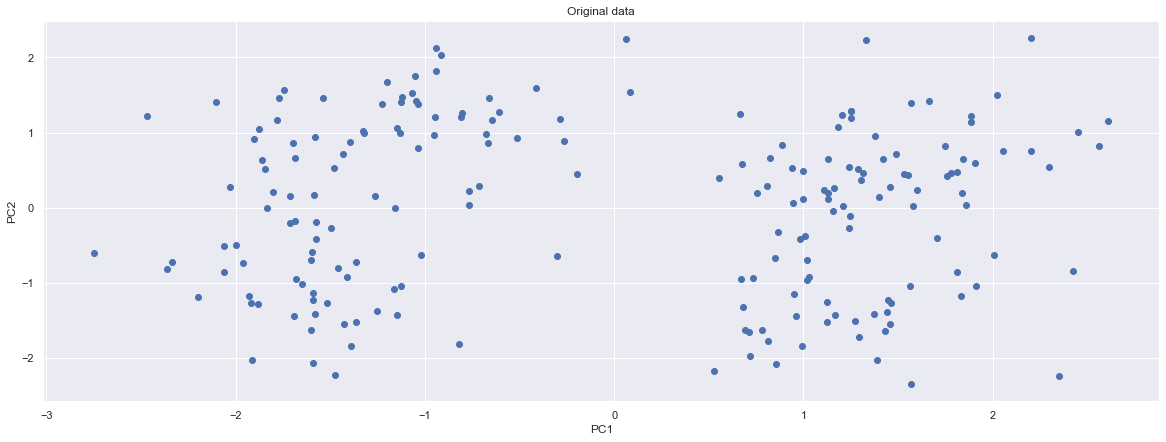

In [5]:
X = crabs[['PC1', 'PC2']].values
plt.scatter(X[:,0], X[:,1])
plt.title('Original data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [10]:
centroids = X[np.random.choice(len(X), 4, replace=False), :]
euclid = cdist(X, centroids ,'euclidean')


In [12]:
minimum = np.array([np.argmin(i) for i in euclid])

In [13]:
minimum

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0])

#### KMeans

In [15]:
def my_kmeans(X, n_center, max_iter):
    """
    Compute kmeans given n_centers
    
    Args:
        X (array): a nxp matrix, with n observations and p variables
        n_centers (int): the number of centers (clusters)
        max_iter (int): the maximum number of iterations, in case the convergence is not reached.
        
    Returns:
        A vector of integers representing the cluster index for each observation
    """
    
    #Create n_center random centroids 
    centroids = X[np.random.choice(len(X), n_center, replace=False), :]
    
    #compute euclidean distance
    euclid = cdist(X, centroids ,'euclidean')
    
    #get minimum distance
    minimum = np.array([np.argmin(i) for i in euclid])
    
    # repeating the above steps again and again for max_iter iterations
    for i in range(max_iter):
        centroids = []
        for k in range(n_center):
            #Update centroid location by taking the average of the points in each cluster group.
            centroids.append(X[minimum==k].mean(axis=0))
        #update centroids
        centroids = np.vstack(centroids)
        euclid = cdist(X, centroids, 'euclidean')
        minimum = np.array([np.argmin(j) for j in euclid])
        
    return minimum

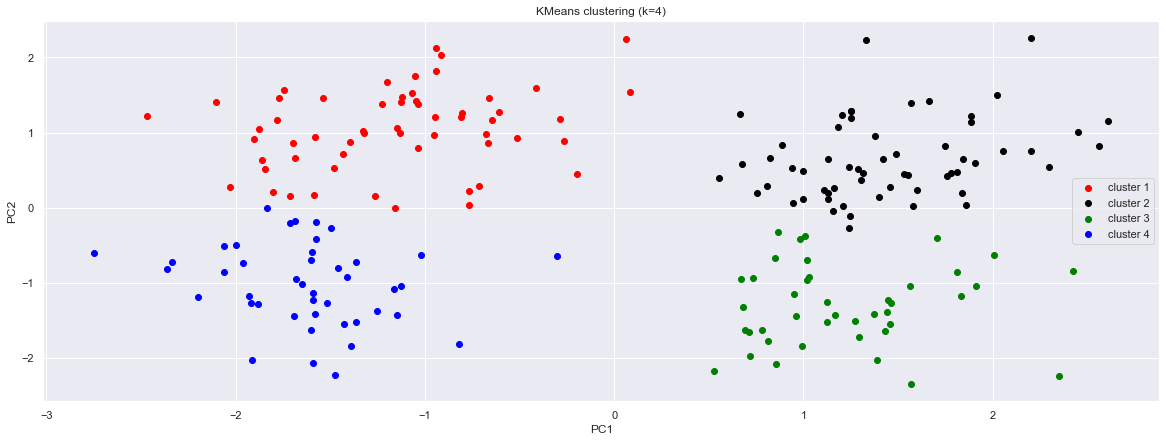

In [16]:
kmeans = my_kmeans(X, 4, 1500)
cluster_1 = X[kmeans == 0]
cluster_2 = X[kmeans == 1]
cluster_3 = X[kmeans == 2]
cluster_4 = X[kmeans == 3]


plt.scatter(cluster_1[:,0] , cluster_1[:,1] , color = 'red', label='cluster 1')
plt.scatter(cluster_2[:,0] , cluster_2[:,1] , color = 'black', label='cluster 2')
plt.scatter(cluster_3[:,0] , cluster_3[:,1] , color = 'green', label='cluster 3')
plt.scatter(cluster_4[:,0] , cluster_4[:,1] , color = 'blue', label='cluster 4')
plt.title('KMeans clustering (k=4)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='center right', bbox_to_anchor=(1, 0.5))
plt.show()